In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'C:\\Users\\hailn9\\Documents\\VinProgram-Content\\lecture\\NLP\\FinalProject\\data\\ijcnlp_dailydialog'

In [5]:
myfile = open('dialogues_text.txt','r',encoding = 'utf-8')
lines = myfile.readlines()
myfile.close()


In [6]:
for line in lines:
    print(line)

The kitchen stinks . __eou__ I'll throw out the garbage . __eou__

So Dick , how about getting some coffee for tonight ? __eou__ Coffee ? I don ’ t honestly like that kind of stuff . __eou__ Come on , you can at least try a little , besides your cigarette . __eou__ What ’ s wrong with that ? Cigarette is the thing I go crazy for . __eou__ Not for me , Dick . __eou__

Are things still going badly with your houseguest ? __eou__ Getting worse . Now he ’ s eating me out of house and home . I ’ Ve tried talking to him but it all goes in one ear and out the other . He makes himself at home , which is fine . But what really gets me is that yesterday he walked into the living room in the raw and I had company over ! That was the last straw . __eou__ Leo , I really think you ’ re beating around the bush with this guy . I know he used to be your best friend in college , but I really think it ’ s time to lay down the law . __eou__ You ’ re right . Everything is probably going to come to a head to

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Karen ? I need to go over a few things with you . __eou__ Certainly . Mr . Graham . When would you like to meet ? __eou__ I was thinking about this afternoon , after the sales meeting . __eou__ Fine . At 3:30 ? __eou__

Rich ! I ’ m glad I caught you . Mr . Carlton ’ s just come over here from the main office . __eou__ Yeah ? What does he want ? __eou__ He needs to see the two of us to talk about next week ’ s annual sales meeting . __eou__ I haven ’ t got two minutes at the moment . Can ’ t you go over things without me ? __eou__

John , I ’ Ve asked you not to smoke in here ! I don ’ t want to see you smoking in my office again . __eou__ I ’ m sorry , Ms . Fairbanks . I won ’ t let it happen again . __eou__ That ’ s what you said the last time ! If you want to smoke , you ’ ll have to use your break time and go outside ! __eou__ I understand , Ms . Fairbanks . __eou__

Allan , I am really disappointed by your lack of effort on this project . __eou__ Look , Sally . I ’ Ve put just as

In [10]:
len(lines)

13118

In [11]:
lines[:5]

["The kitchen stinks . __eou__ I'll throw out the garbage . __eou__\n",
 'So Dick , how about getting some coffee for tonight ? __eou__ Coffee ? I don ’ t honestly like that kind of stuff . __eou__ Come on , you can at least try a little , besides your cigarette . __eou__ What ’ s wrong with that ? Cigarette is the thing I go crazy for . __eou__ Not for me , Dick . __eou__\n',
 'Are things still going badly with your houseguest ? __eou__ Getting worse . Now he ’ s eating me out of house and home . I ’ Ve tried talking to him but it all goes in one ear and out the other . He makes himself at home , which is fine . But what really gets me is that yesterday he walked into the living room in the raw and I had company over ! That was the last straw . __eou__ Leo , I really think you ’ re beating around the bush with this guy . I know he used to be your best friend in college , but I really think it ’ s time to lay down the law . __eou__ You ’ re right . Everything is probably going to come 

In [13]:
lines[1].rstrip().split('__eou__')[:-1]

['So Dick , how about getting some coffee for tonight ? ',
 ' Coffee ? I don ’ t honestly like that kind of stuff . ',
 ' Come on , you can at least try a little , besides your cigarette . ',
 ' What ’ s wrong with that ? Cigarette is the thing I go crazy for . ',
 ' Not for me , Dick . ']

In [24]:
from string import punctuation
import re

def preprocess_text(text):
    text = text.replace(" ’ ","’")
    text = text.replace("’s"," is")
    text = text.replace("’m"," am")
    text = text.replace("’re"," are")
    text = text.replace("n’t", " not")
    text = text.replace("’ll", ' will')
    text = re.sub(r'[0-9]+', '', text)
    text = text.split('__eou__')[:-1]
    return text
context = []
for line in lines:
    line = preprocess_text(line)
    context.append(line)
context[5]

['Is not he the best instructor ? I think he is so hot . Wow ! I really feel energized , do not you ? ',
 ' I swear , I am going to kill you for this . ',
 ' What is wrong ? Did not you think it was fun ? ! ',
 ' Oh , yeah ! I had a blast ! I love sweating like a pig with a bunch of pot bellies who all smell bad . Sorry , I am just not into this health kick . ',
 ' Oh , no , get off it . It was not such a killer class . You just have to get into it . Like they say , no pain , no gain . ',
 ' I am wiped out . Thank you . ',
 ' Look , next time get yourself some comfy shoes . You are gonna come back again with me , are not you ? ',
 ' Never ! But thank you for inviting me . ',
 ' Come on . You will feel better after we hit the showers . ']

In [17]:
from string import punctuation

print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [25]:
import matplotlib.pyplot as plt

(array([4.433e+03, 3.611e+03, 2.538e+03, 1.976e+03, 3.660e+02, 1.250e+02,
        4.300e+01, 1.400e+01, 9.000e+00, 3.000e+00]),
 array([ 2. ,  5.3,  8.6, 11.9, 15.2, 18.5, 21.8, 25.1, 28.4, 31.7, 35. ]),
 <BarContainer object of 10 artists>)

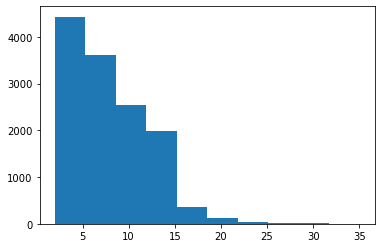

In [26]:
plt.hist([len(row) for row in context])

In [36]:
context_df = []
for row in context:
    if len(row) < 8:
        row = list(reversed(row))
        row.extend([' ']*(8-len(row)))
    if len(row) > 8:
        row = list(reversed(row[:8]))
    context_df.append(row)
    
print(len(context_df))

13118


In [30]:
a = [1,2,3]
a.extend([' ']*6)
a

[1, 2, 3, ' ', ' ', ' ', ' ', ' ', ' ']

In [37]:
columns = ['response','context','context/0','context/1','context/2','context/3','context/4','context/5']
df = pd.DataFrame.from_records(context_df,columns = columns)

In [39]:
df.head(30)

,response,context,context/0,context/1,context/2,context/3,context/4,context/5
0,I'll throw out the garbage .,The kitchen stinks .,,,,,,
1,"Not for me , Dick .",What is wrong with that ? Cigarette is the th...,"Come on , you can at least try a little , bes...",Coffee ? I do not honestly like that kind of ...,"So Dick , how about getting some coffee for to...",,,
2,You are right . Everything is probably going ...,"Leo , I really think you are beating around t...",Getting worse . Now he is eating me out of ho...,Are things still going badly with your housegu...,,,,
3,OK . We'll wait .,I'm not sure . But I'll get a table ready as ...,"Well , how long will it be ?",Would you mind waiting a while ?,,,,
4,The pleasure is mine .,Thanks a lot . That's the favor I was going t...,Are you going to the annual party ? I can give...,,,,,
5,Never ! But thank you for inviting me .,"Look , next time get yourself some comfy shoe...",I am wiped out . Thank you .,"Oh , no , get off it . It was not such a kill...","Oh , yeah ! I had a blast ! I love sweating l...",What is wrong ? Did not you think it was fun ...,"I swear , I am going to kill you for this .",Is not he the best instructor ? I think he is ...
6,Sounds delicious . OK . She'll try that .,Certainly . How about spaghetti with clams an...,"Well , I want a fillet steak , medium , but m...",Can I take your order now or do you still want...,,,,
7,I just happen to have a question for you guys...,"Oh , don't let that worry you . If that were ...",According to some studies it may cause cancer .,What's wrong with MSG ? It helps to bring out...,"Oh , great ! It's delicious . You see , I am ...",Good mastery . How do you like our Chinese fo...,Why not ? See .,Can you manage chopsticks ?
8,"Okay , let's go home .",I'm exhausted .,,,,,,
9,I'm afraid all the big tables are taken .,"Six , including two kids .","How many of you , please ?","No , we don't .",Good evening . Welcome to Cherry's . Do you ha...,,,


In [42]:
df.to_csv('dialog_df.csv')